<a href="https://colab.research.google.com/github/Wandeboi/Formation_Evaluation/blob/main/formation_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.2 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [40]:
well = lasio.read("akos-2.las").df()

In [41]:
well.reset_index(inplace=True)

In [42]:
well

,DEPTH,SONIC,CAL,NPHI,RHOB,GR_NM,LL9D
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29996,14998.0,NaN,NaN,NaN,NaN,NaN,NaN
29997,14998.5,NaN,NaN,NaN,NaN,NaN,NaN
29998,14999.0,NaN,NaN,NaN,NaN,NaN,NaN
29999,14999.5,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
filepath = '/content/Akos_02 top-Copy1.csv'

tops = pd.read_csv(filepath)

tops

,Formation,DEPTH
0,B2000_top,6935
1,B2000_base,7362
2,B3000_top,7598
3,B3000_base,8377
4,ZZak1,8382
...,...,...
82,G8000_base,13588
83,H1000_top,14365
84,H1000_base,14472
85,H2000_top,14528


In [54]:
  import numpy as np
  import pandas as pd

  # generate list of formation depths and top names
  fm_tops = df_tops.iloc[:,0].values
  fm_depths = df_tops.iloc[:,1].values

  # create FM. LABEL column to well dataframe
  # initiate with NaNs
  df_well[label_name] = np.full(len(df_well), np.nan)

  indexes = []
  topnames = []
  for j in range(len(fm_depths)):
    # search index at which the DEPTH in the well df equals to OR
    # larger than the DEPTH of each pick in the pick df
    if (df_well[column_depth].iloc[-1] > fm_depths[j]):
      index = df_well.index[(df_well[column_depth] >= fm_depths[j])][0]
      top = fm_tops[j]
      indexes.append(index)
      topnames.append(top)

  # replace the NaN in the LABEL column of well df
  # at the assigned TOP NAME indexes
  df_well[label_name].loc[indexes] = topnames

  # Finally, using pandas "ffill" to fill all the rows
  # with the TOP NAMES
  df_well = df_well.fillna(method='ffill')

  df_well

,DEPTH,SONIC,CAL,NPHI,RHOB,GR_NM,LL9D,Surface
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29996,14998.0,124.375,6.0,0.4554,2.5966,94.6087,2.2679,H2000_base
29997,14998.5,124.375,6.0,0.4554,2.5966,94.6087,2.2679,H2000_base
29998,14999.0,124.375,6.0,0.4554,2.5966,94.6087,2.2679,H2000_base
29999,14999.5,124.375,6.0,0.4554,2.5966,94.6087,2.2679,H2000_base


In [55]:
well['Surface'] = well['Surface'].fillna('Unknown')

In [56]:
well

,DEPTH,SONIC,CAL,NPHI,RHOB,GR_NM,LL9D,Surface
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...
29996,14998.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
29997,14998.5,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
29998,14999.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
29999,14999.5,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [99]:
def well_log_display(df, column_depth, column_list,
                     column_semilog=None, min_depth=None, max_depth=None,
                     column_min=None, column_max=None, colors=None,
                     fm_tops=None, fm_depths=None,
                     tight_layout=3, title_size=10):
  """
  Display log side-by-side style
  Input:
  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display

  column_semilog is specific for resistivity column; if your resistivities are
    in column 3, specify as: column_semilog=2. Default is None, so if you don't
    specify, the resistivity will be plotted in normal axis instead

  column_min is list of minimum values for the x-axes.
  column_max is list of maximum values for the x-axes.

  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)
  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops
  """
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,20))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis()

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis()


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,20))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])

        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis()

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])

        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis()

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])
        # y = fm_depths[j] / (max_depth - min_depth)
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)


  plt.show()


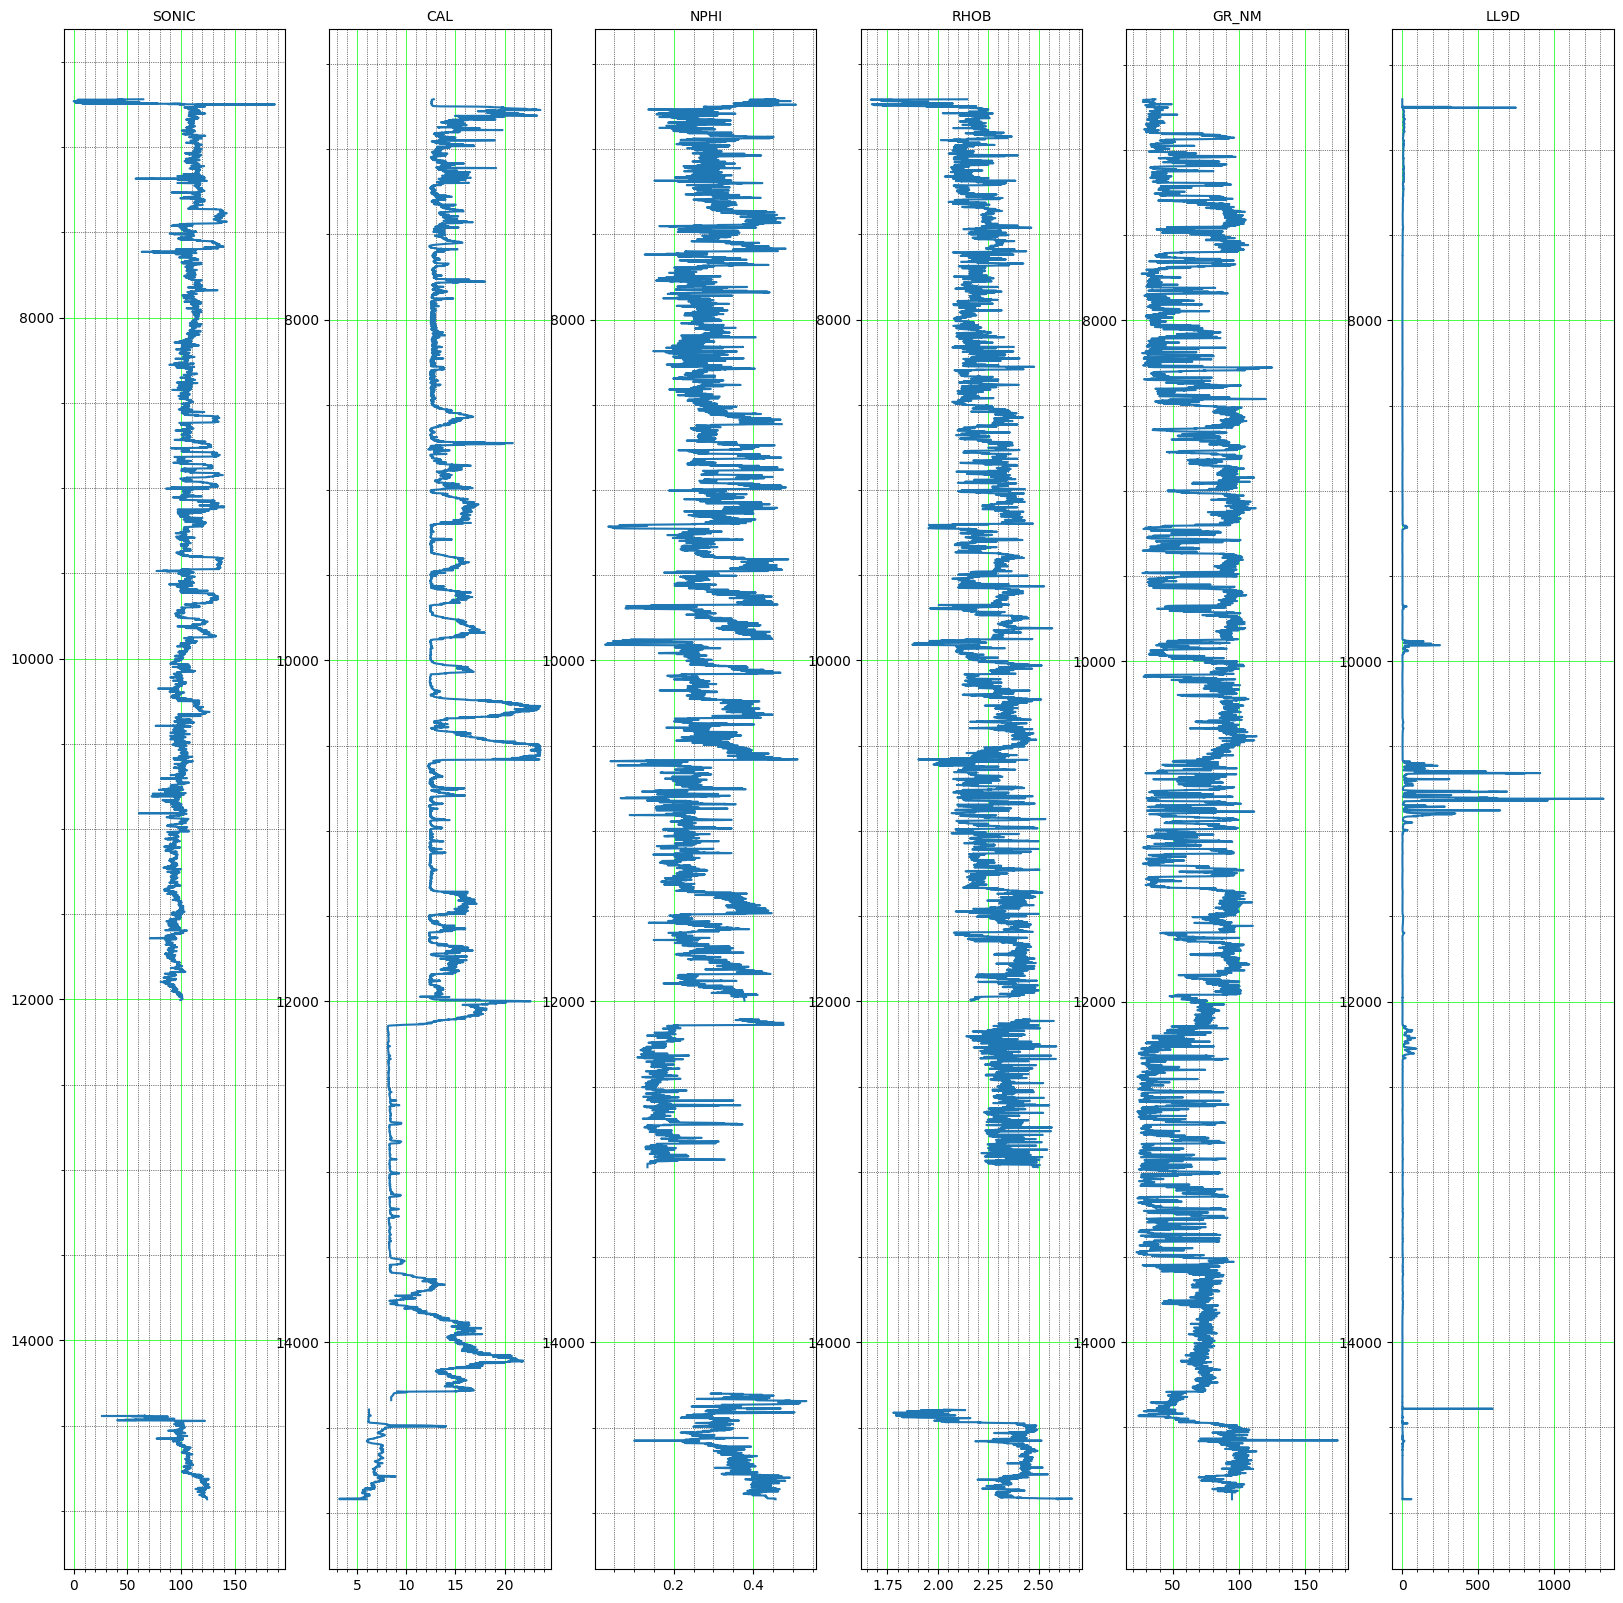

In [100]:
df = well
column_depth = 'DEPTH'
column_list = ['SONIC',	'CAL',	'NPHI',	'RHOB',	'GR_NM',	'LL9D']

well_log_display(df, column_depth, column_list)

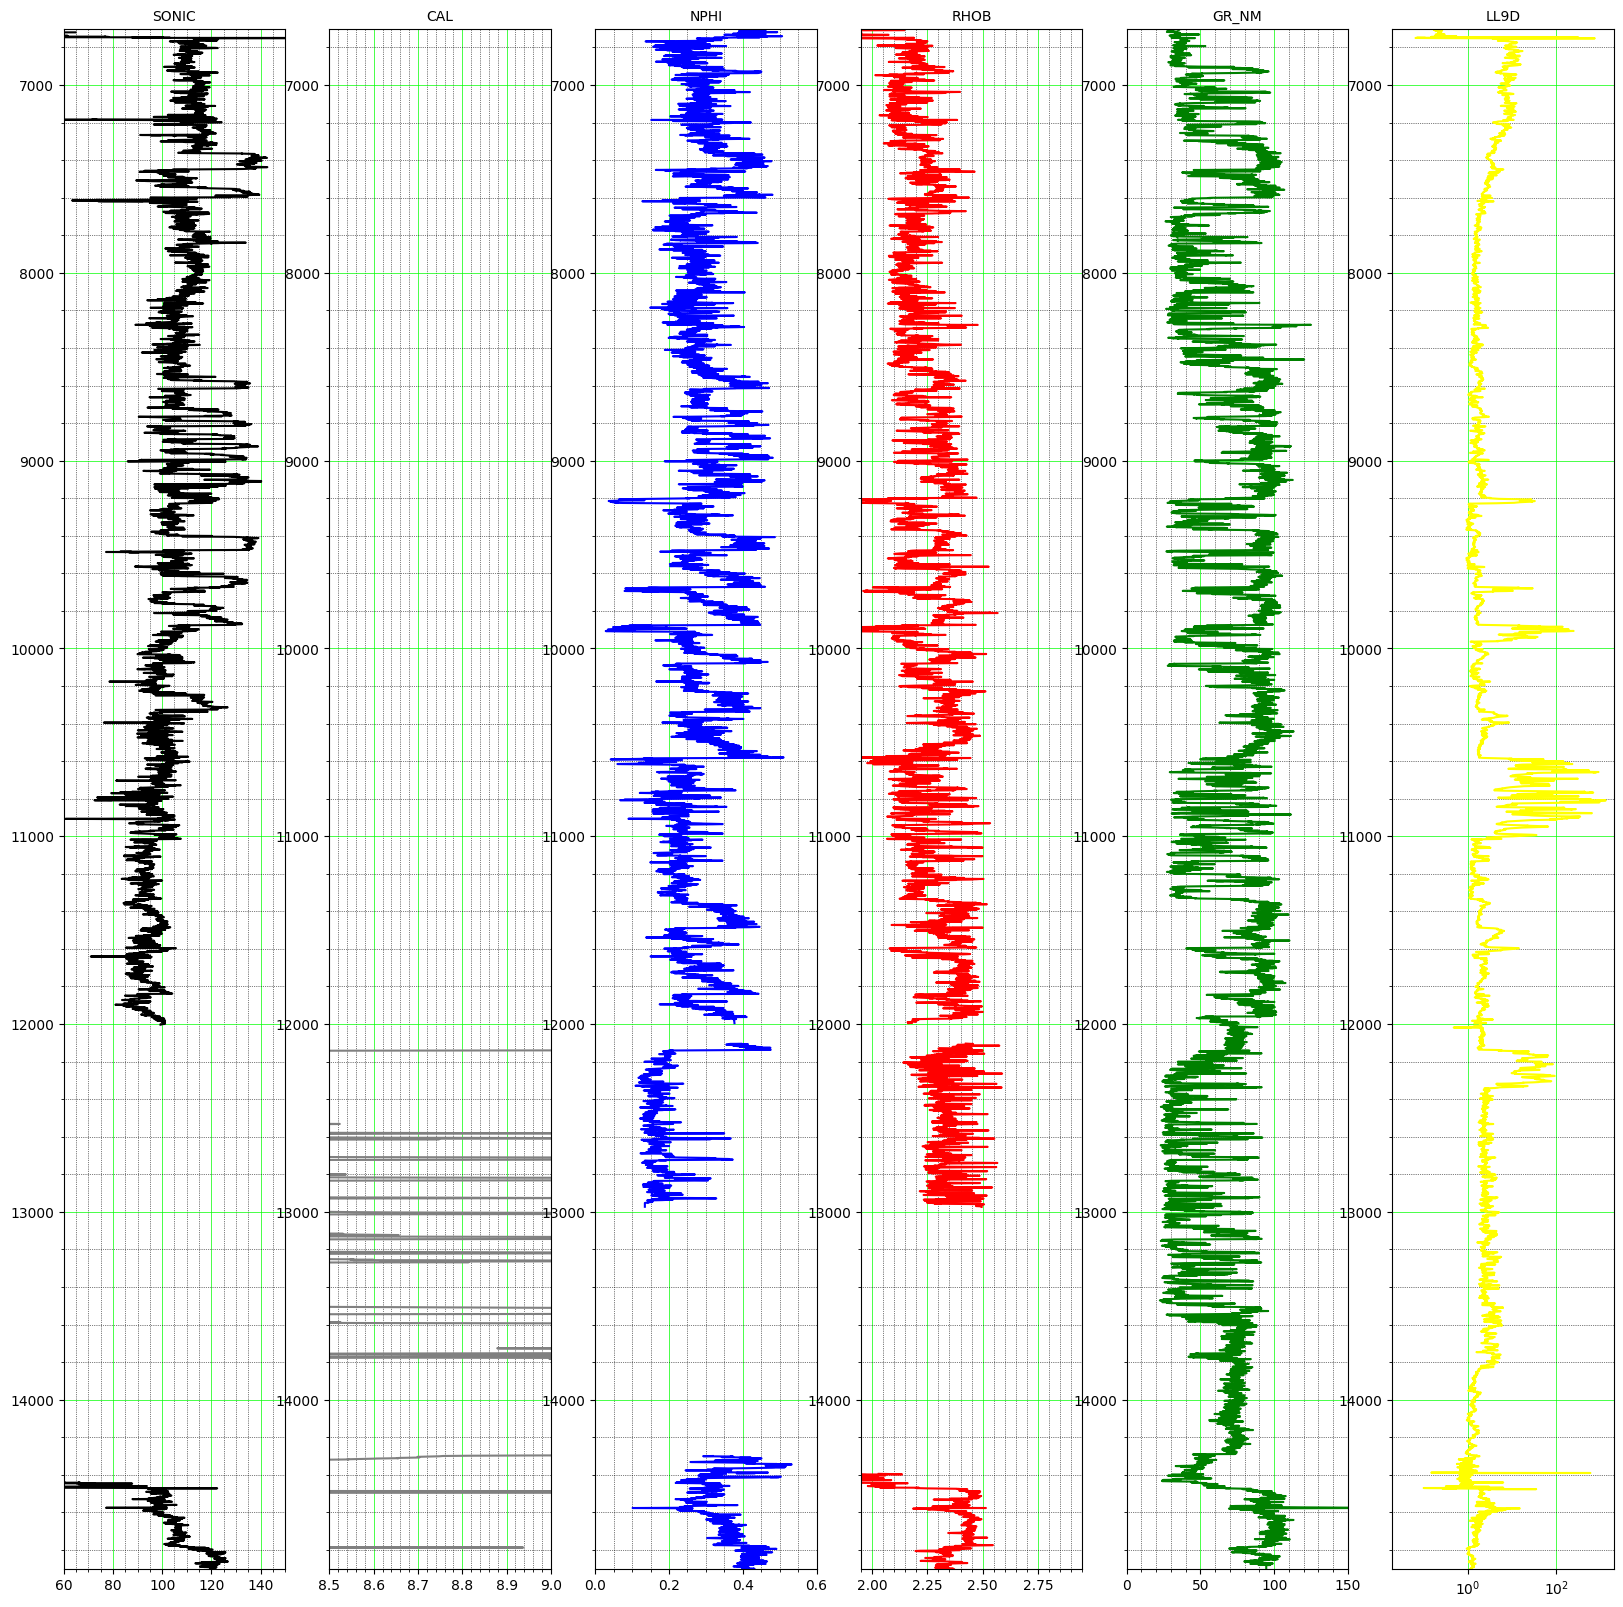

In [101]:
df = well
column_depth = 'DEPTH'
column_list = ['SONIC',	'CAL',	'NPHI',	'RHOB',	'GR_NM',	'LL9D']

column_semilog=5
min_depth=6700
max_depth=14900
column_min=[60, 8.5, 0, 1.95, 0, 0.02]
column_max=[150, 9, 0.6, 2.95, 150, 2000]
colors=['black', 'grey', 'blue', 'red', 'green', 'yellow']

well_log_display(df, column_depth, column_list,
                 column_semilog, min_depth,
                 max_depth, column_min, column_max, colors)

In [143]:
def triple_combo(df, column_depth, column_GR, column_resistivity,
                 column_NPHI, column_RHOB, min_depth, max_depth,
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=0.2, max_resistivity=2000,
                 color_GR='black', color_resistivity='green',
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(20,20), tight_layout=5,
                 title_size=20, title_height=0.95):
  """
  Producing Triple Combo log

  Input:

  df is your dataframe
  column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
  are column names that appear in your dataframe (originally from the LAS file)

  specify your depth limits; min_depth and max_depth

  input variables other than above are default. You can specify
  the values yourselves.

  Output:

  Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)
  """

  import matplotlib.pyplot as plt
  from matplotlib.ticker import AutoMinorLocator
  import numpy as np

  fig, ax=plt.subplots(1,3,figsize=(20,20))
  fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':', linewidth='1', color='black')

  # First track: GR
  ax[0].get_xaxis().set_visible(False)
  ax[0].invert_yaxis()

  gr=ax[0].twiny()
  gr.set_xlim(min_GR,max_GR)
  gr.set_xlabel('GR',color=color_GR)
  gr.set_ylim(max_depth, min_depth)
  gr.spines['top'].set_position(('outward',10))
  gr.tick_params(axis='x',colors=color_GR)
  gr.plot(df[column_GR], df[column_depth], color=color_GR)

  gr.minorticks_on()
  gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  gr.xaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line>=df[column_GR]), color = 'gold', linewidth=0) # sand
  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line<df[column_GR]), color = 'grey', linewidth=0) # shale

  # Second track: Resistivity
  ax[1].get_xaxis().set_visible(False)
  ax[1].invert_yaxis()

  res=ax[1].twiny()
  res.set_xlim(min_resistivity,max_resistivity)
  res.set_xlabel('Resistivity',color=color_resistivity)
  res.set_ylim(max_depth, min_depth)
  res.spines['top'].set_position(('outward',10))
  res.tick_params(axis='x',colors=color_resistivity)
  res.semilogx(df[column_resistivity], df[column_depth], color=color_resistivity)

  res.minorticks_on()
  res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

  # Third track: NPHI and RHOB
  ax[2].get_xaxis().set_visible(False)
  ax[2].invert_yaxis()

  ## NPHI curve
  nphi=ax[2].twiny()
  nphi.set_xlim(0,0.6)
  nphi.invert_xaxis()
  nphi.set_xlabel('NPHI',color='blue')
  nphi.set_ylim(max_depth, min_depth)
  nphi.spines['top'].set_position(('outward',10))
  nphi.tick_params(axis='x',colors='blue')
  nphi.plot(df[column_NPHI], df[column_depth], color=color_NPHI)

  nphi.minorticks_on()
  nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

  ## RHOB curve
  rhob=ax[2].twiny()
  rhob.set_xlim(1.95,2.95)
  rhob.set_xlabel('RHOB',color='red')
  rhob.set_ylim(max_depth, min_depth)
  rhob.spines['top'].set_position(('outward',50))
  rhob.tick_params(axis='x',colors='red')
  rhob.plot(df[column_RHOB], df[column_depth], color=color_RHOB)

  # solution to produce fill between can be found here:
  # https://stackoverflow.com/questions/57766457/how-to-plot-fill-betweenx-to-fill-the-area-between-y1-and-y2-with-different-scal
  x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[column_RHOB], df[column_depth]]).T
  nphi.autoscale(False)
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[column_NPHI])) # hydrocarbon
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[column_NPHI])) # water

  res.minorticks_on()
  res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.grid(which='minor', linestyle=':', linewidth='1', color='black')


  plt.show()


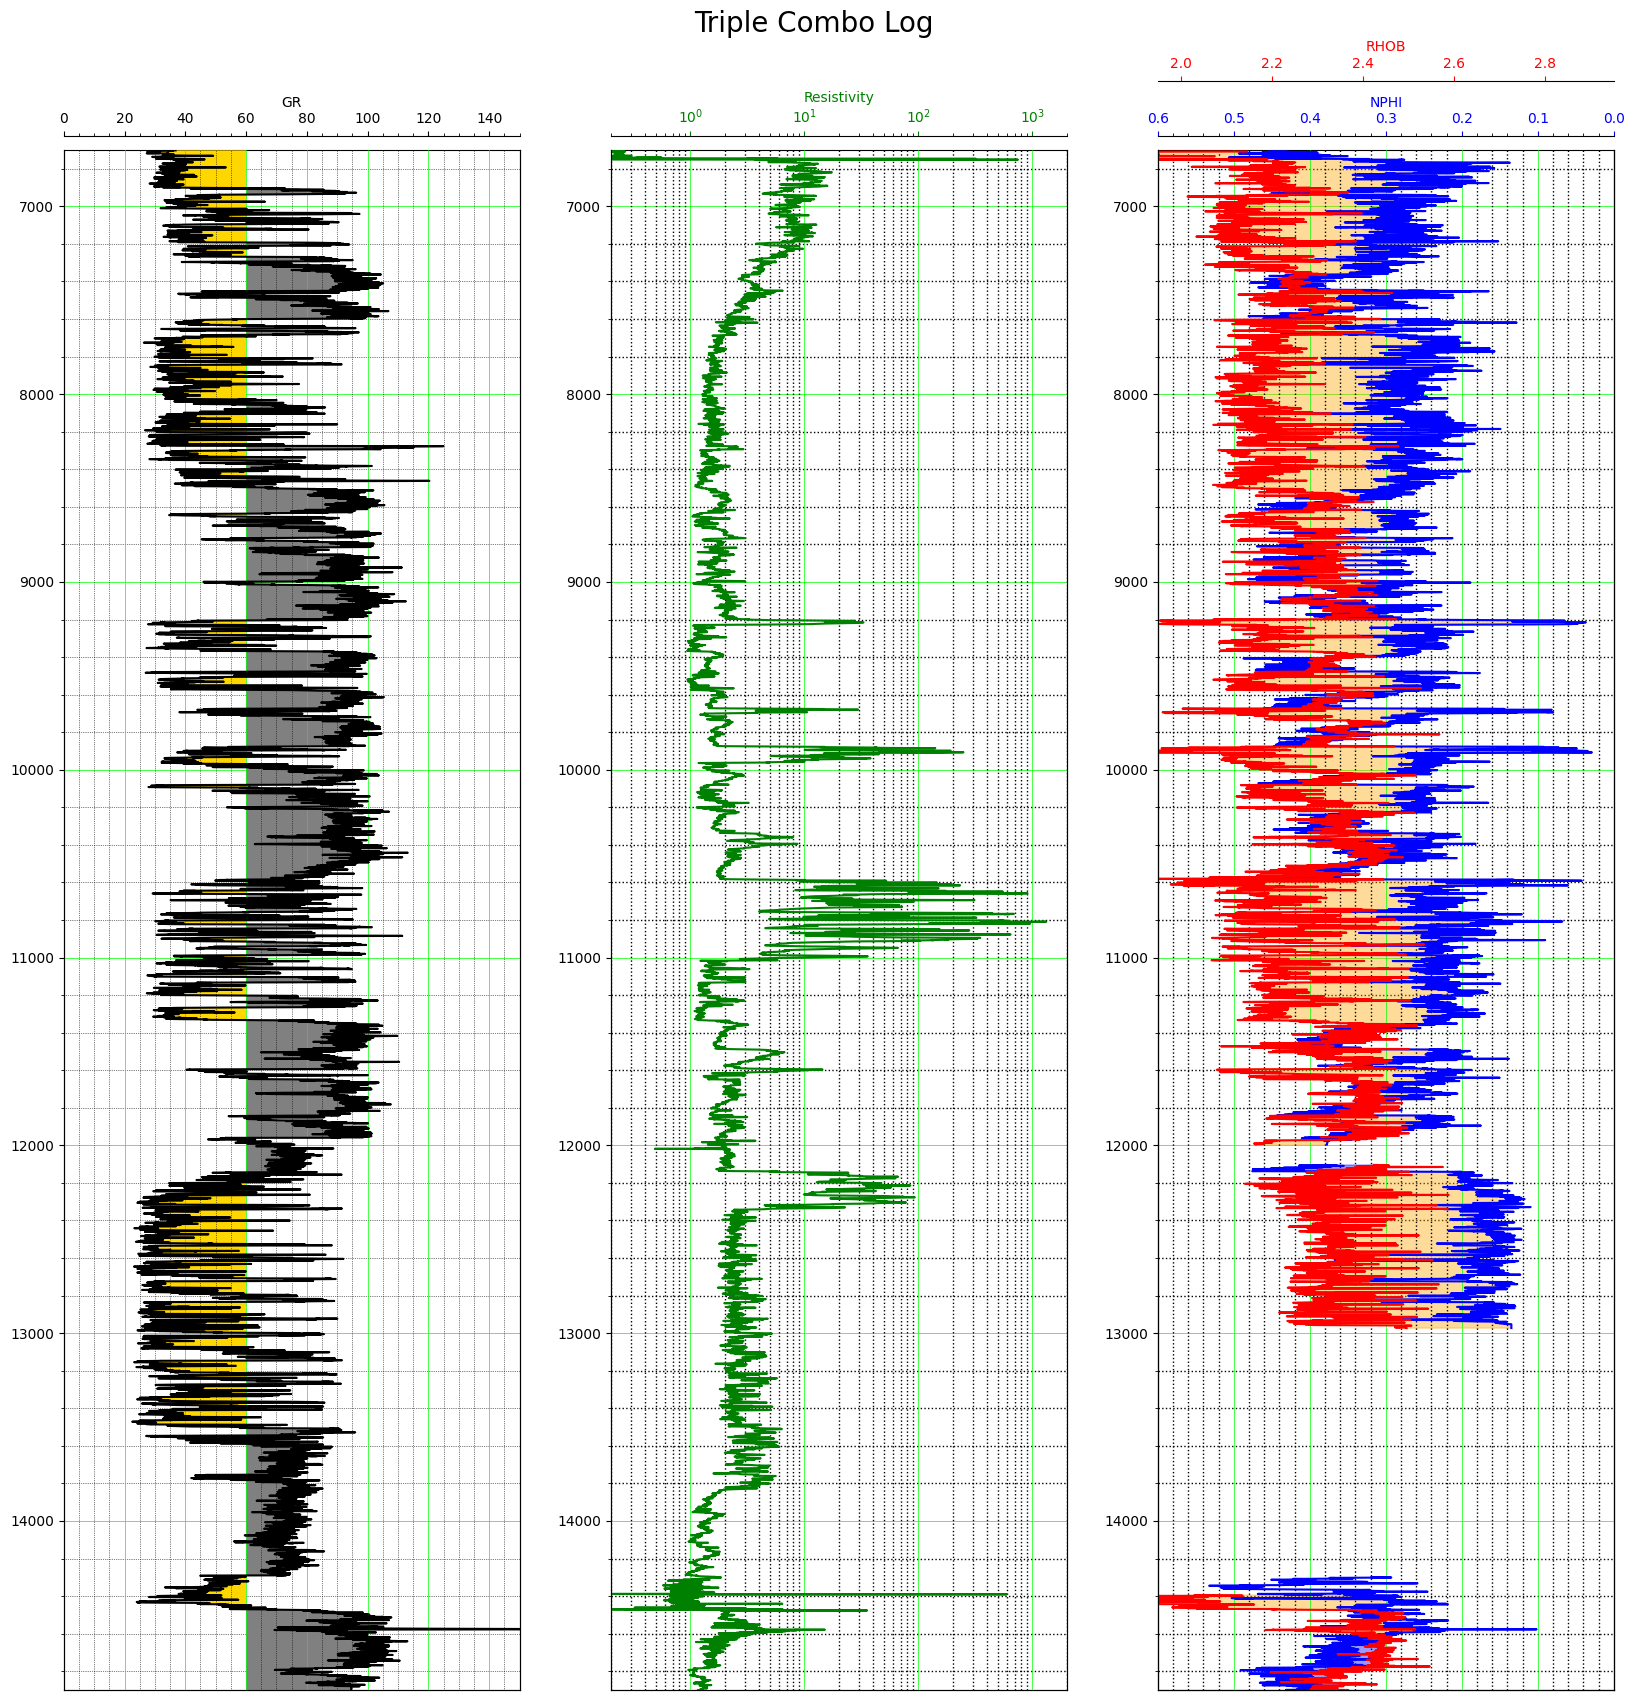

In [144]:
df = well
column_depth = 'DEPTH'
column_GR = 'GR_NM'
column_resistivity = 'LL9D'
column_NPHI = 'NPHI'
column_RHOB = 'RHOB'
min_depth = 6700
max_depth = 14900

triple_combo(df, column_depth, column_GR, column_resistivity,
                 column_NPHI, column_RHOB, min_depth, max_depth)

In [145]:
def ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by,
            figsize=(7,7), scatter_size=50, scatter_alpha=0.5):
  """
  Producing Neutron-Density (Cross)plot

  Input:

  denfl is your fluid density
  df is your dataframe
  column_nphi and column_rhob are the column name of your NPHI and RHOB
  column_hue is the column name that you want for the color of the points
    e.g. depth, vshale, formation labels, etc.

  color_by depends on the column_hue that you're giving
    * if you're giving a continuous hue (numerical) like depth or vshale
      define color_by='continuous'
    * if you're giving a categorical hue (labels) like formation names
      define color_by='categorical'

  figsize, scatter_size, scatter_alpha are by default. You can also specify
    by yourselves.

  Output:

  3 lines. Blue is sandstone, black is limestone, red is dolomite
  Each line has dots representing porosity value from 0 to 0.5
    by increment of 0.05
  """

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns
  plt.style.use('seaborn')
  sns.set_theme(color_codes=True)

  lsX = np.arange(0, 0.55, 0.05)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  if color_by == 'continuous':
    # plot data with color of the continuous variable defined (depth, vsh, etc.)
    plt.figure(figsize=figsize)

    plt.scatter(df[column_nphi], df[column_rhob], c=df[column_hue],
                alpha=scatter_alpha, cmap='viridis')
    plt.colorbar()

    # plot the sand, limestone, and dolomite line (using Seaborn)
    plt.plot(ssCnlX, denSs, '.-', color='blue', markersize=10, label = 'Sandstone')
    plt.plot(lsX, denLs, '.-', color='black', markersize=10, label = 'Limestone')
    plt.plot(dolCnlX, denDol, '.-', color='red', markersize=10, label = 'Dolomite')

    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (v/v)'); plt.ylabel('RHOB (g/cc)')

  if color_by == 'categorical':
    # plot data with color of each formation names (using Seaborn)
    lm = sns.lmplot(data=df, x=column_nphi, y=column_rhob, hue=column_hue,
                    fit_reg=False, height=figsize[0],
                    scatter_kws={'s': scatter_size, 'alpha': scatter_alpha})

    ax = lm.axes

    # plot the sand, limestone, and dolomite line (using Seaborn)
    lines = pd.DataFrame({'ssCnlX': ssCnlX, 'lsX': lsX, 'dolCnlX': dolCnlX,
                          'denLs': denLs, 'denSs': denSs, 'denDol': denDol})

    sns.lineplot(data=lines, x='ssCnlX', y='denSs', color='blue',
                     legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='lsX', y='denLs', color='black',
                 legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='dolCnlX', y='denDol', color='red',
                 legend=False, marker='o', ax=ax[0,0])

    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (v/v)'); plt.ylabel('RHOB (g/cc)')

    plt.show()

<ipython-input-145-e48ee5176a66>:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


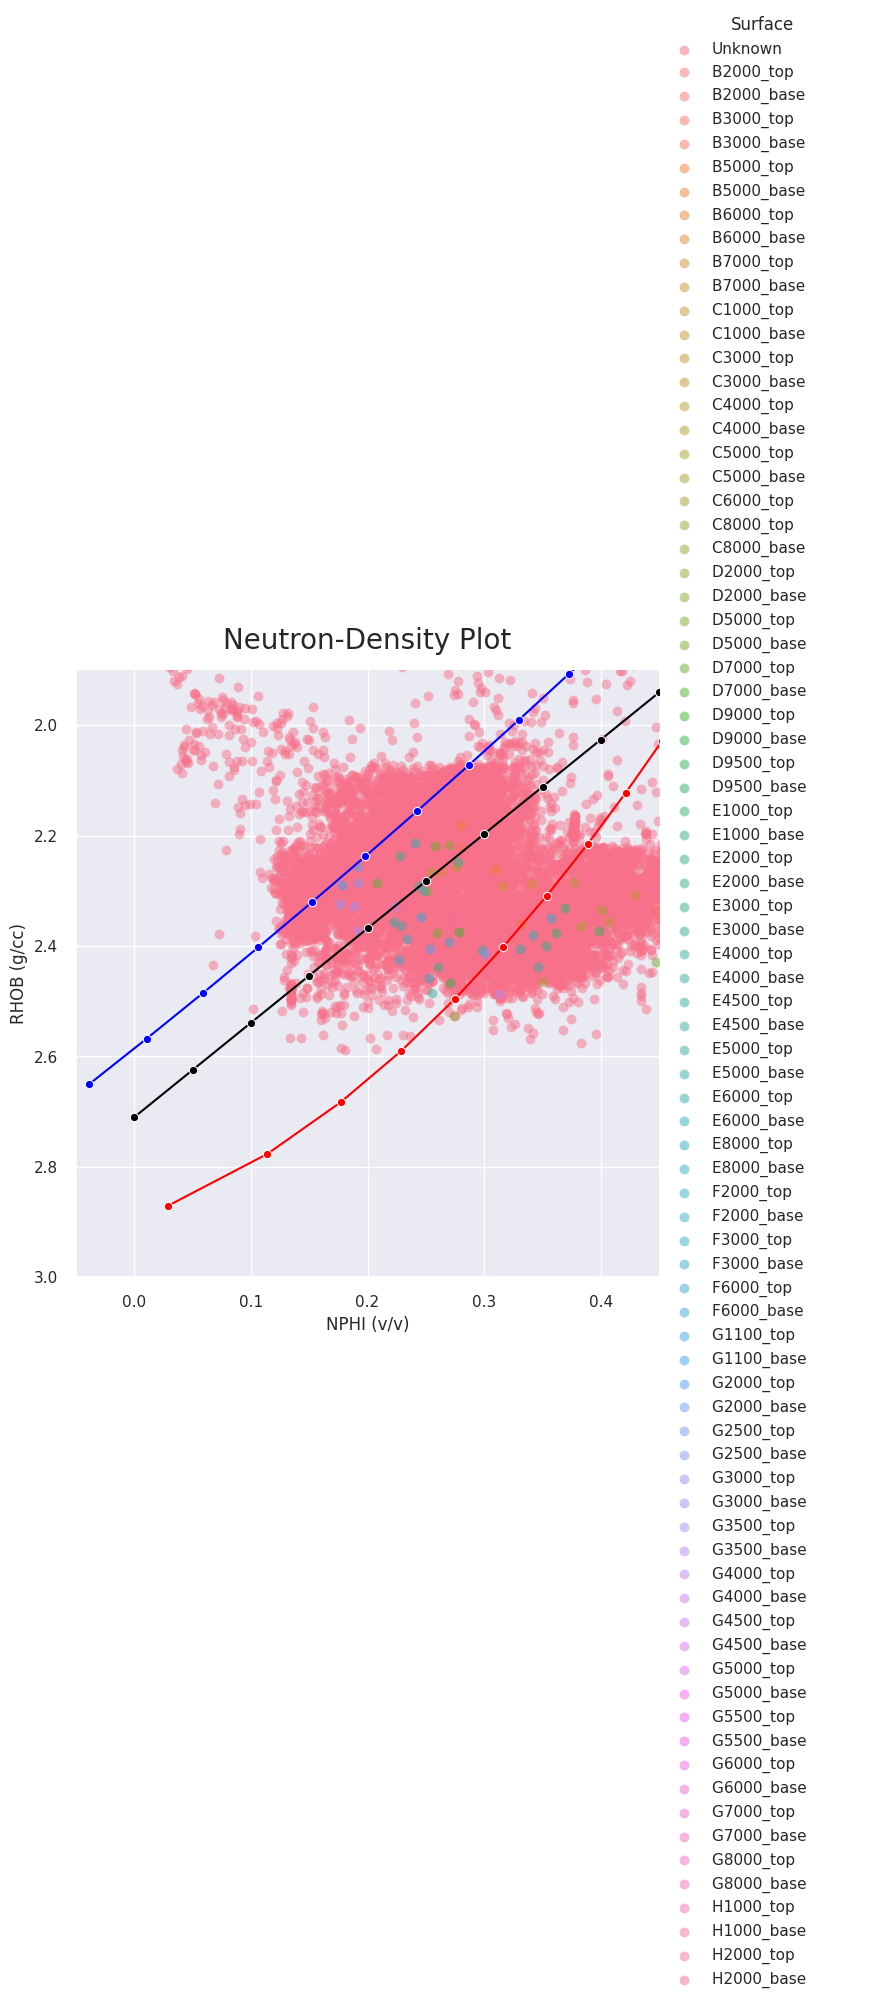

In [146]:
denfl = 1
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'Surface'
color_by = 'categorical'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

<ipython-input-145-e48ee5176a66>:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


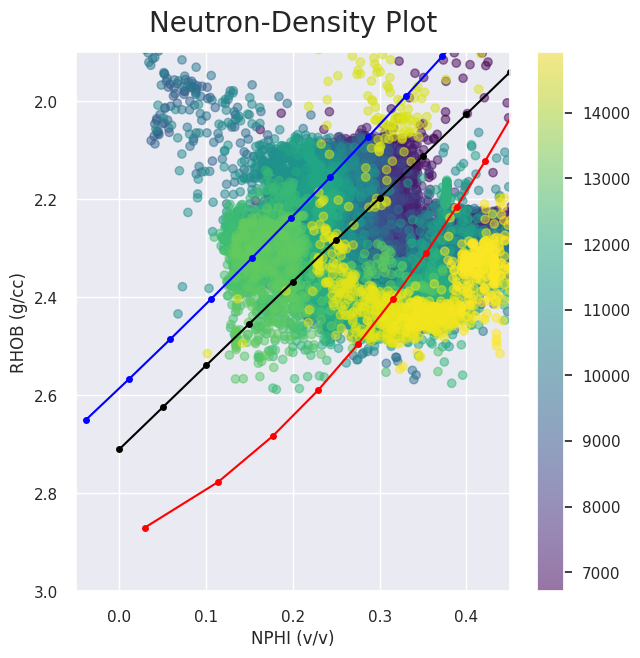

In [148]:
denfl = 1
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'DEPTH'
color_by = 'continuous'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

<ipython-input-145-e48ee5176a66>:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


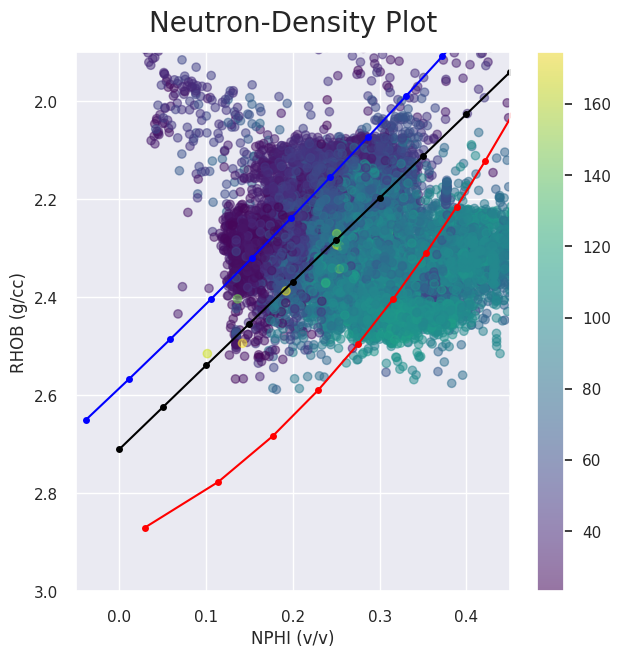

In [149]:
denfl = 1
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'GR_NM'
color_by = 'continuous'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)